===========================================================================================================================
# TensorFlow 小试牛刀
    1. session使用
    2. 小试Tensorflow运算, 可视化工具tf.summary.FileWriter
    3. 张量形式初始化
    4. 使用numpy初始化
    5. TensorFlow运算
    
===========================================================================================================================

### 1. session使用
    会话 : 
            调用: sess = tf.Session() 
            启动: sess.run()
            关闭: sess.close()
            
    或者使用如下形式, 可以不用另外使用sess.close()进行关闭:
            with tf.Session() as sess:
                sess.run(...)   ##括号内为tensor
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a = tf.random_normal([2,20]) #随机产生2x20维的tensor张量
sess  = tf.Session() 
out = sess.run(a)
print(a) 
print(out)
sess.close()

Tensor("random_normal:0", shape=(2, 20), dtype=float32)
[[-1.17571342 -0.8181079   0.13617688 -0.0347572  -0.69379592  1.77875865
  -1.13154626 -0.71804094  1.10468388 -1.25748777  0.13849412  1.59290826
  -1.34012473  0.5917117   1.30602837  0.18281165 -0.02864516  0.48521626
  -1.06931448  2.19589901]
 [-0.79119933 -0.55259347 -0.32863447  1.41453004 -0.21451706 -0.14985228
   0.54872745  0.67416221 -1.74512339  0.68638498  1.50598502 -1.11158752
   0.92441356  0.56095374 -0.6426971   0.92038411  1.07986271  0.71437734
  -1.07673359  0.08319221]]


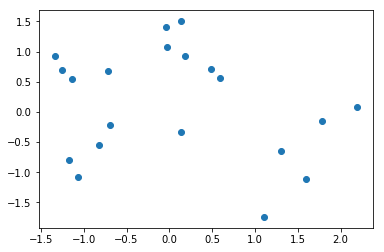

In [3]:
x,y = out
plt.scatter(x,y)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Session的等价写法
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
b = tf.random_normal([2,20]) 
with tf.Session() as sess:
    out = sess.run(b)
    print (out)

[[-0.72672832  0.40845513 -0.26302633  1.1011548   1.56911576 -0.12411822
   0.52731961  1.91480851  0.28041232 -0.28986892  0.16222334  1.06008494
  -1.28243756 -1.00771177  0.25920957  1.18341053 -0.6401667   0.38734633
   0.72411627 -1.63910806]
 [ 2.87834406  0.36988306  0.0449262  -2.30602121 -0.64611953 -0.1381752
   0.26259458  1.48153698 -0.39790961 -0.52201551 -0.46458051  0.53652519
   2.29160976 -0.83046633 -0.1317533  -1.4471575   1.51793385  0.73115069
  -0.48730153 -0.84688473]]


In [5]:
c = tf.random_normal([2,20]) 
sess = tf.Session()
with sess.as_default():
    # result为某个张量
    print(c.eval())
sess.close()

[[ 0.0568483   1.66904652 -0.04489568  0.9018687   1.08727455 -0.09198004
   0.24133597 -0.63310206 -0.29139403  0.48760319 -0.42970622 -0.51129818
   1.15601885  0.50492758  0.06235959 -1.15860891  0.13526826 -0.96766025
   1.33438528  0.47745857]
 [-1.74676991 -1.96885991  1.55076325 -1.01423883 -1.29568982 -0.86611557
   0.99140149 -1.05285239 -0.79555398  0.30760711  0.05048806 -0.53888142
   0.67644954  0.29883882  0.79092938  1.14896703  0.7358979   1.13079858
  -0.14535461 -1.70560932]]


In [6]:
sess  = tf.Session() 
print(c.eval(session=sess))   
sess.close()

[[-0.54001236  0.75542831 -1.31325138  0.10441947 -0.6565854   0.78192115
  -0.57194453  0.29147232 -0.17854011  0.7120344  -1.20821941  1.26826549
   0.20758544  0.29210702 -1.42057633 -2.37210703 -0.30466628 -0.6553126
   0.73934579  0.26443654]
 [-0.8440724  -0.60572976  0.58235168 -0.61547273  0.37301883 -0.34859627
  -1.86299872 -0.29900622 -0.50664198 -0.20835191 -1.32376969  0.68198657
   0.36384487 -0.0696463  -0.75180131  1.35014403 -1.10985708 -0.26539946
   0.34529483 -1.64866865]]


===========================================================================================================================
###  2. 小试Tensorflow运算, 可视化工具tf.summary.FileWriter
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [7]:
a = tf.constant(5,  name = "input_a")
b = tf.constant(3,  name = "input_b")
c = tf.multiply(a, b, name = "mul_c")
d = tf.add(a, b, name = "add_d")
e = tf.add(c, d, name = "add_e")


In [8]:
print (a)
print (b)
print (c)
print (d)
print (e)

Tensor("input_a:0", shape=(), dtype=int32)
Tensor("input_b:0", shape=(), dtype=int32)
Tensor("mul_c:0", shape=(), dtype=int32)
Tensor("add_d:0", shape=(), dtype=int32)
Tensor("add_e:0", shape=(), dtype=int32)


In [9]:
sess  = tf.Session()
print(sess.run(a))
print(sess.run(b))
print(sess.run(c))
print(sess.run(d))
print(sess.run(e))

5
3
15
8
23


In [10]:
writer = tf.summary.FileWriter('./my_graph/0', sess.graph)
sess.close()
writer.close()

#### 在终端输入:

        tensorboard --logdir="my_graph/0"
        
#### 打开浏览器输入http://yang-All-Series:6006 会得到如下结果:

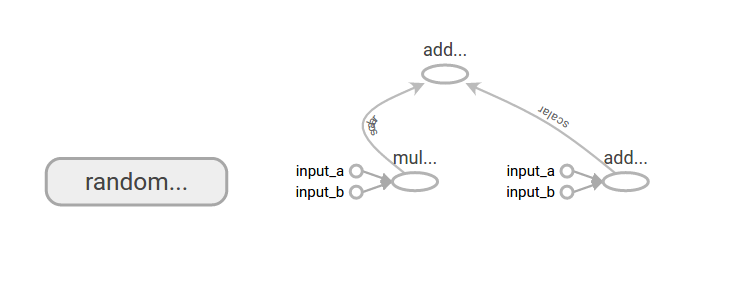

===========================================================================================================================
### 3. 张量形式初始化
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
a = tf.constant([5, 3],  name = "input_a_1")
b = tf.reduce_prod(a, name = "prod_b_1")
c = tf.reduce_sum(a, name = "sum_c_1")
d = tf.add(b, c ,name = "add_d_1")

In [13]:
with tf.Session() as sess:
    print("a:  ", sess.run(a))
    print("b:  ", sess.run(b))
    print("c:  ", sess.run(c))
    print("d:  ", sess.run(d))
    writer = tf.summary.FileWriter('./my_graph/0', sess.graph)
    writer.close()

a:   [5 3]
b:   15
c:   8
d:   23


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### 对比两次初始化,其中右边为张量形式:
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
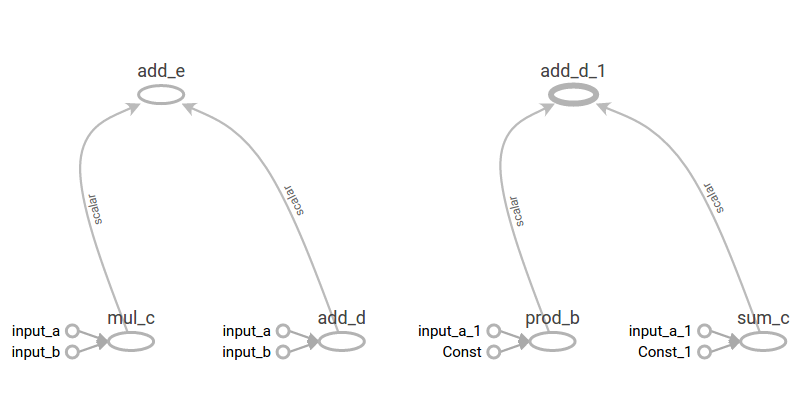

===========================================================================================================================
### 4. 使用numpy初始化
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
a = np.array([2, 3], dtype = np.int32)
b = np.array([4, 5], dtype = np.int32)
c = tf.add(a, b, name = "my_add_c")
print (c)
with tf.Session() as sess:
    print("c:  ", sess.run(c))

Tensor("my_add_c:0", shape=(2,), dtype=int32)
c:   [6 8]


In [16]:
# numpy可以直接被Tensor使用,反之不然! 
# 即可以用numpy初始化Tensor, 但是不能用Tensor初始化numpy
# 并且上例子可见使用 Session.run() 返回的都是Numpy数组

np.int32 == tf.int32


True

In [17]:
# 0阶, 32位整型
t_0 = np.array(50, dtype = np.int32)

# 1阶, 字符串 (对于字符串,不要在怒骂朋友中显示dtype)
t_1 = np.array([b"apple", b"peach", b"grape"])

# 2阶, bool
t_2 = np.array([[True, False, False],
                           [False, False, True],
                           [False, True, False]],
                            dtype = np.bool)

# 3阶, 64位整型
t_3 = np.array([ [ [0, 0], [0, 1], [0, 2] ],
                           [ [1, 0], [1, 1], [1, 2] ],
                           [ [2, 0], [2, 1], [2, 2] ]],
                            dtype = np.int64)

In [18]:
res_t_1 = tf.reduce_prod(t_3 , name = "prod_res_t_1")
res_t_2 = tf.reduce_sum(t_3, name = "sum_res_t_2")
with tf.Session() as sess:
    print("res_t_1:  ", sess.run(res_t_1))
    print("res_t_2:  ", sess.run(res_t_2))

res_t_1:   0
res_t_2:   18


===========================================================================================================================
### 5. TensorFlow运算
    (1).基本算术运算
    (2).数值大小对比
    (3).基本逻辑运算
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [19]:

#  (1).基本算术运算

a = np.array([2, 3], dtype = np.int32)
b = np.array([4, 5], dtype = np.int32)
c = np.array([[True, False, False],
                           [False, False, True],
                           [False, True, False]],
                            dtype = np.bool)
d =  np.array([-4, 5])
e = np.array([2., 3.])
f = np.array([4., 5.])
print ("a: \t{}".format(a))
print ("b: \t{}".format(b))
print ("c: \t{}".format(c))
print ("d: \t{}".format(d))
print ("=======================================")

with tf.Session() as sess:
    #  - x: 取反 tf.negative(a)
    res = sess.run(tf.negative(a))
    print("{}:\t{}\t 结果:{}".format("取反", "tf.negative(a)", res))
    
    #  ~ x: 逻辑非 tf.logical_not(c)
    res = sess.run(tf.logical_not(c))
    print("{}:\t{}\t 结果:{}".format("逻辑非", "tf.logical_not(c)", res))
    
    #  abs(x): 绝对值 tf.abs(d)
    res = sess.run(tf.abs(d))
    print("{}:\t{}\t 结果:{}".format("绝对值", "tf.abs(d)", res))
    
    #  x+y: 逐项加 tf.add(tensor, tensor)
    res = sess.run(tf.add(a,b))
    print("{}:\t{}\t 结果:{}".format("逐项加", "tf.add(tensor, tensor)", res))
    
    #  x+y: 逐项加 tf.add(tensor, *)
    res = sess.run(tf.add(a,2))
    print("{}:\t{}\t 结果:{}".format("逐项加", "tf.add(tensor, *)", res))
    
    #  x-y: 逐项减 tf.subtract(a,b)
    res = sess.run(tf.subtract(a,b))
    print("{}:\t{}\t 结果:{}".format("逐项加", "tf.subtract(a,b)", res))
    
    #  x-y: 逐项减 tf.subtract(a,2)
    res = sess.run(tf.subtract(a,2))
    print("{}:\t{}\t 结果:{}".format("逐项减", "tf.subtract(a,2)", res))

    #  x*y: 逐项乘 tf.multiply(a,b)
    res = sess.run(tf.multiply(a,b))
    print("{}:\t{}\t 结果:{}".format("逐项乘", "tf.multiply(a,b)", res))
    
    #  x*y: 逐项乘 tf.multiply(a,2)
    res = sess.run(tf.multiply(a,2))
    print("{}:\t{}\t 结果:{}".format("逐项乘", "tf.multiply(a,2)", res))
    
    #  x/y: 逐项除(整型输入) tf.div(b,a)
    res = sess.run(tf.div(b,a))
    print("{}:\t{}\t 结果:{}".format("逐项除(整型输入)", "tf.div(b,a)", res))

    #  x/y: 逐项浮点除法(整型输入) tf.truediv(b,a)
    res = sess.run( tf.truediv(b,a))
    print("{}:\t{}\t 结果:{}".format("逐项浮点除法(整型输入)", "tf.truediv(b,a)", res))
    
    #  x/y: 逐项除(浮点型输入) tf.div(f,e)
    res = sess.run(tf.div(f,e))
    print("{}:\t{}\t 结果:{}".format("逐项除(浮点型输入)", "tf.div(f,e)", res))
    
    #  x/y: 逐项取整除法(浮点型输入)  tf.floordiv(f,e)
    res = sess.run(tf.floordiv(f,e))
    print("{}:\t{}\t 结果:{}".format("逐项取整除法(浮点型输入) ", "tf.floordiv(f,e)", res))
    
    #  x/y: 逐项取余 tf.mod(b,a)
    res = sess.run( tf.mod(b,a))
    print("{}:\t{}\t 结果:{}".format("逐项取余", "tf.mod(b,a)", res))
    
    #  x/y: 逐项取余 tf.mod(b,3)
    res = sess.run( tf.mod(b,3))
    print("{}:\t{}\t 结果:{}".format("逐项取余", "tf.mod(b,3)", res))
    
    #  x/y: 逐项取幂 tf.pow(b,a)
    res = sess.run( tf.pow(b,a))
    print("{}:\t{}\t 结果:{}".format("逐项取幂", "tf.pow(b,a)", res))
    
    #  x/y: 逐项取幂 tf.pow(b,a)
    res = sess.run( tf.pow(b,2))
    print("{}:\t{}\t 结果:{}".format("逐项取幂", "tf.pow(b,a)", res))
    
    
    

a: 	[2 3]
b: 	[4 5]
c: 	[[ True False False]
 [False False  True]
 [False  True False]]
d: 	[-4  5]
取反:	tf.negative(a)	 结果:[-2 -3]
逻辑非:	tf.logical_not(c)	 结果:[[False  True  True]
 [ True  True False]
 [ True False  True]]
绝对值:	tf.abs(d)	 结果:[4 5]
逐项加:	tf.add(tensor, tensor)	 结果:[6 8]
逐项加:	tf.add(tensor, *)	 结果:[4 5]
逐项加:	tf.subtract(a,b)	 结果:[-2 -2]
逐项减:	tf.subtract(a,2)	 结果:[0 1]
逐项乘:	tf.multiply(a,b)	 结果:[ 8 15]
逐项乘:	tf.multiply(a,2)	 结果:[4 6]
逐项除(整型输入):	tf.div(b,a)	 结果:[2 1]
逐项浮点除法(整型输入):	tf.truediv(b,a)	 结果:[ 2.          1.66666667]
逐项除(浮点型输入):	tf.div(f,e)	 结果:[ 2.          1.66666667]
逐项取整除法(浮点型输入) :	tf.floordiv(f,e)	 结果:[ 2.  1.]
逐项取余:	tf.mod(b,a)	 结果:[0 2]
逐项取余:	tf.mod(b,3)	 结果:[1 2]
逐项取幂:	tf.pow(b,a)	 结果:[ 16 125]
逐项取幂:	tf.pow(b,a)	 结果:[16 25]


In [20]:
# (2).数值大小对比

tmp = np.array([ [ [0, 0], [0, 1], [0, 2] ],
                           [ [1, 0], [1, 1], [1, 2] ],
                           [ [2, 0], [2, 1], [2, 2] ]],
                            dtype = np.int64)
with tf.Session() as sess:
    print ( "输出tmp小于1")
    keep_ind = sess.run(tf.less(tmp,1))
    print (keep_ind)
    print(tmp[keep_ind])


输出tmp小于1
[[[ True  True]
  [ True False]
  [ True False]]

 [[False  True]
  [False False]
  [False False]]

 [[False  True]
  [False False]
  [False False]]]
[0 0 0 0 0 0]


In [21]:
tmp = np.array([ [ [0, 0], [0, 1], [0, 2] ],
                           [ [1, 0], [1, 1], [1, 2] ],
                           [ [2, 0], [2, 1], [2, 2] ]],
                            dtype = np.int64)
with tf.Session() as sess:
    print ('----------------------- 小于 1 -------------------------')
    print (sess.run(tf.less(tmp,1)))
    print ('----------------------- 小于等于 1 -------------------------')
    print (sess.run(tf.less_equal(tmp,1)))
    print ('----------------------- 大于 1 -------------------------')
    print (sess.run(tf.greater(tmp,1)))
    print ('----------------------- 大于等于 1 -------------------------')
    print (sess.run(tf.greater_equal(tmp,1)))
    print ('----------------------- 等于 1 -------------------------')
    print (sess.run(tf.equal(tmp,1)))

----------------------- 小于 1 -------------------------
[[[ True  True]
  [ True False]
  [ True False]]

 [[False  True]
  [False False]
  [False False]]

 [[False  True]
  [False False]
  [False False]]]
----------------------- 小于等于 1 -------------------------
[[[ True  True]
  [ True  True]
  [ True False]]

 [[ True  True]
  [ True  True]
  [ True False]]

 [[False  True]
  [False  True]
  [False False]]]
----------------------- 大于 1 -------------------------
[[[False False]
  [False False]
  [False  True]]

 [[False False]
  [False False]
  [False  True]]

 [[ True False]
  [ True False]
  [ True  True]]]
----------------------- 大于等于 1 -------------------------
[[[False False]
  [False  True]
  [False  True]]

 [[ True False]
  [ True  True]
  [ True  True]]

 [[ True False]
  [ True  True]
  [ True  True]]]
----------------------- 等于 1 -------------------------
[[[False False]
  [False  True]
  [False False]]

 [[ True False]
  [ True  True]
  [ True False]]

 [[False False]
  [Fa

In [22]:
# (3).基本逻辑运算
tmp_1 = np.array([[True, False, False],
                           [False, True, True],
                           [False, True, False]],
                            dtype = np.bool)
tmp_2 = np.array([[ False, True, False],
                           [True, True, False],
                           [False, False, True]],
                            dtype = np.bool)
print("tmp_1:")
print(tmp_1)
print("tmp_1:")
print(tmp_2)
print("==============================")
with tf.Session() as sess:
    print ('----------------------- tmp_1 & tmp_2 -------------------------')
    print (sess.run(tf.logical_and(tmp_1,tmp_2)))
    print ('----------------------- tmp_1 | tmp_2 -------------------------')
    print (sess.run(tf.logical_or(tmp_1,tmp_2)))
    print ('----------------------- tmp_1 ^ tmp_2 -------------------------')
    print (sess.run(tf.logical_xor(tmp_1,tmp_2)))
    print ('----------------------- ~tmp_1 -------------------------')
    print (sess.run(tf.logical_not(tmp_1)))


tmp_1:
[[ True False False]
 [False  True  True]
 [False  True False]]
tmp_1:
[[False  True False]
 [ True  True False]
 [False False  True]]
----------------------- tmp_1 & tmp_2 -------------------------
[[False False False]
 [False  True False]
 [False False False]]
----------------------- tmp_1 | tmp_2 -------------------------
[[ True  True False]
 [ True  True  True]
 [False  True  True]]
----------------------- tmp_1 ^ tmp_2 -------------------------
[[ True  True False]
 [ True False  True]
 [False  True  True]]
----------------------- ~tmp_1 -------------------------
[[False  True  True]
 [ True False False]
 [ True False  True]]
